In [ ]:
def WER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Word Error Rate between 2 strings
    """
    # Splits str to list of words 
    hypo = hypo.split()
    ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r

def CER(hypo:str, ref:str):
    """
    Inputs:
        - hypo: predicted string from ocr
        - ref: correct string
    Returns (float) Character Error Rate between 2 strings
    """
    # No need to split strings to list of words.
    # hypo = hypo.split()
    # ref = ref.split()

    h = len(hypo)
    r = len(ref)
    D = np.zeros((r+1, h+1))
    D[0,:] = np.arange(h+1)
    D[:,0] = np.arange(r+1)
    for i in range(1,r+1):
        for j in range(1,h+1):
            if ref[i-1] == hypo[j-1]:
                D[i,j] = D[i-1,j-1]
            else:
                D[i,j] = min(D[i-1,j-1], D[i-1,j], D[i,j-1]) + 1
    return D[r,h]/r


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
! pip install --quiet vietocr==0.3.2

     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 952kB 14.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 880kB 34.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.


# Inference Experimentation

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cpu'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpl_w2az25/dl
152MB [00:01, 141MB/s] 


In [ ]:
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
! unzip -qq -o ./data_line.zip

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
61.2MB [00:00, 66.0MB/s]


In [ ]:
import os

In [ ]:
cd /content/data_line/InkData_line_processed

/content/data_line/InkData_line_processed


In [ ]:
import numpy as np

In [ ]:
hypo = "Today is a happy day"
ref = "Today is an awesome day"

print(WER(hypo, ref))
print(CER(hypo, ref))

0.4
0.34782608695652173


In [ ]:
def get_line(file_path):
    with open(file_path, 'r') as f:
        return f.readlines()
len(get_line(file_train))

5483

In [ ]:
total_wer = 0.0
total_cer = 0.0
file_test = '/content/data_line/test_line_annotation.txt'
file_train = '/content/data_line/train_line_annotation.txt'
lines = get_line(file_test) # + get_line(file_train)
src = '/content/data_line/'
# from tqdm import tqdm
lines = lines[:200] # Take the first 
for line in tqdm(lines):
    file, content = line.split('\t')
    file = os.path.join(src, file)
    img = Image.open(file)
    s = detector.predict(img)
    total_wer += WER(s, content)
    total_cer += CER(s, content)

print('Average WER: ', total_wer/len(lines))
print('Average CER: ', total_cer/len(lines))    

Average WER:  0.6633281132443796
Average CER:  0.33737040719759614

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_config = Cfg.load_config_from_file('/content/drive/MyDrive/Colab/VBDI_DL/config.yml')
new_config['weights'] = '/content/drive/MyDrive/Colab/VBDI_DL/transformerocr.pth'
new_config['cnn']['pretrained']=False
new_config['device'] = 'cpu'
new_config['predictor']['beamsearch']=False

new_detector = Predictor(new_config)

In [ ]:
total_wer = 0.0
total_cer = 0.0
file_test = '/content/data_line/test_line_annotation.txt'
file_train = '/content/data_line/train_line_annotation.txt'
lines = get_line(file_test) # + get_line(file_train)
src = '/content/data_line/'
# from tqdm import tqdm
lines = lines[:200] # Take the first 200 files
for line in tqdm(lines):
    file, content = line.split('\t')
    file = os.path.join(src, file)
    img = Image.open(file)
    s = new_detector.predict(img)
    total_wer += WER(s, content)
    total_cer += CER(s, content)

print('Average WER: ', total_wer/len(lines))
print('Average CER: ', total_cer/len(lines))  

Average WER:  0.2082419839050919
Average CER:  0.10447404045828099

In [ ]:
pwd

'/content/data_line/InkData_line_processed'

In [ ]:
next_config = Cfg.load_config_from_name('vgg_seq2seq')

next_config['cnn']['pretrained']=False
next_config['device'] = 'cpu'
next_config['predictor']['beamsearch']=False

next_detector = Predictor(next_config)

total_wer = 0.0
total_cer = 0.0
file_test = '/content/data_line/test_line_annotation.txt'
file_train = '/content/data_line/train_line_annotation.txt'
lines = get_line(file_test) # + get_line(file_train)
src = '/content/data_line/'
# from tqdm import tqdm
lines = lines[:200] # Take the first 200 files
for line in lines:
    file, content = line.split('\t')
    file = os.path.join(src, file)
    img = Image.open(file)
    s = next_detector.predict(img)
    total_wer += WER(s, content)
    total_cer += CER(s, content)

print('Average WER: ', total_wer/len(lines))
print('Average CER: ', total_cer/len(lines))  

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpqntvikk5/dl

0.00B [00:00, ?B/s]
17.3MB [00:00, 112MB/s]
41.4MB [00:00, 133MB/s]
89.6MB [00:00, 203MB/s]


Average WER:  0.8445733017604301
Average CER:  0.4957882145760734


In [ ]:
i = 0
for line in lines:
    i += 1
    file, content = line.split('\t')
    file = os.path.join(src, file)
    img = Image.open(file)
    s = next_detector.predict(img)
    print('Predicted: ',s,'\n','Truth: ',content,'\n')
    if i > 20:
        break

Predicted:  triển tiên thì đến giả sự m.t 
 Truth:  niên tên Hà đến gửi 200.000 đ.
 

Predicted:  thủ sinh viên của một có giả, nói hạn năm.. 2001. Hại người công chiết. " nhi quá hà thên, 
 Truth:  thẻ sinh viên của một cô gái, hết hạn năm... 2001. Mọi người cùng cười : " Xui quá hả? Thôi,
 

Predicted:  số xãng không phủa là chối khi đị đó khái cho can chiếu chuyên nhà cát mà 
 Truth:  xứ này không phải lo khi chết đi để khổ cho con cháu chuyện chôn cất nữa.
 

Predicted:  một nghà người cho khác và dương chước chuy chủ chiến đạo là đội 
 Truth:  xét nghiệm HIV cho kết quả dương tính. Chúng tôi chưa kịp làm được
 

Predicted:  nguy chính hường năm lượng nước liện có, và để nghị Tr điển khan kếp dự các 
 Truth:  nước sạch bằng nửa lượng nước hiện có, và đề nghị TP triển khai tiếp dự án
 

Predicted:  cho chi don các thi tron công một nghi được thông biển c. a nham làm khi 
 Truth:  cảm " với dân. " Lần đầu tiên trong một nghị định, những hành vi vi phạm kèm hình
 

Predicted:  phá đại

# Train model - backbone VGG - seq2seq



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': './data_line/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt'},
 'device': 'cuda:0',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/transformerocr.pth',
  'iters': 20000,
  'log': './train.

You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmppwv0ep8k/dl
152MB [00:00, 265MB/s]


Computing MD5: /tmp/tranformerorc.pth


Create train_hw:   0%|                                                     | 0/5483 [00:00<?, ?it/s]

MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:04<00:00, 1117.88it/s]


Created dataset with 5482 samples


Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1341.34it/s]


Created dataset with 1812 samples


valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 116035.28it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

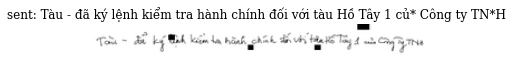

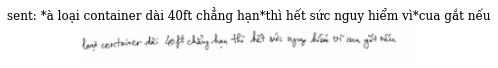

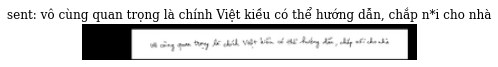

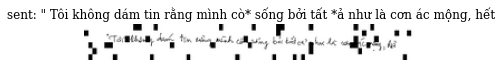

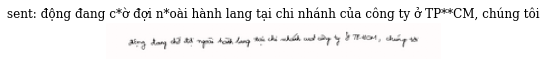

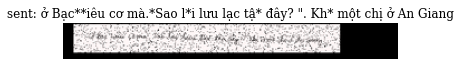

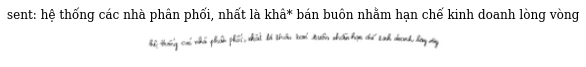

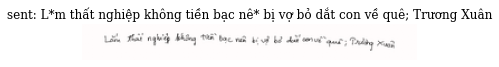

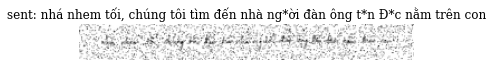

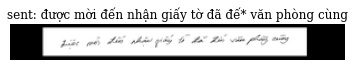

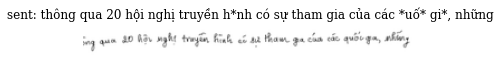

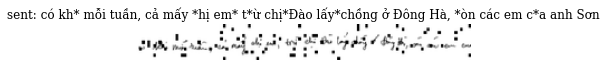

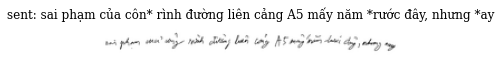

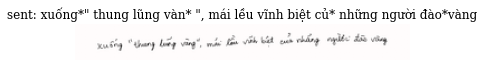

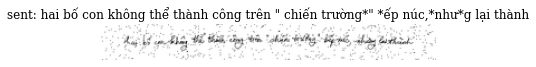

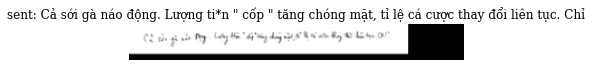

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.648 - lr: 1.91e-05 - load time: 1.21 - gpu time: 81.37
iter: 000400 - train loss: 1.431 - lr: 3.95e-05 - load time: 0.74 - gpu time: 84.56
iter: 000600 - train loss: 1.335 - lr: 7.14e-05 - load time: 0.66 - gpu time: 84.56
iter: 000800 - train loss: 1.264 - lr: 1.12e-04 - load time: 1.27 - gpu time: 84.47
iter: 001000 - train loss: 1.202 - lr: 1.56e-04 - load time: 0.71 - gpu time: 84.06
iter: 001200 - train loss: 1.179 - lr: 2.01e-04 - load time: 0.61 - gpu time: 84.49
iter: 001400 - train loss: 1.155 - lr: 2.41e-04 - load time: 1.34 - gpu time: 84.80
iter: 001600 - train loss: 1.131 - lr: 2.73e-04 - load time: 0.59 - gpu time: 84.76
iter: 001800 - train loss: 1.101 - lr: 2.93e-04 - load time: 0.75 - gpu time: 83.82
iter: 002000 - train loss: 1.087 - lr: 3.00e-04 - load time: 0.77 - gpu time: 84.60
iter: 002200 - train loss: 1.071 - lr: 3.00e-04 - load time: 1.24 - gpu time: 84.77
iter: 002400 - train loss: 1.048 - lr: 3.00e-04 - load time: 0.65 - gpu time

Visualize prediction from our trained model


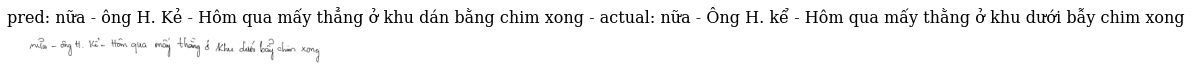

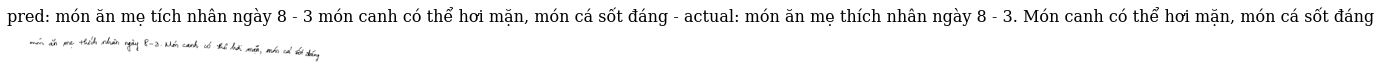

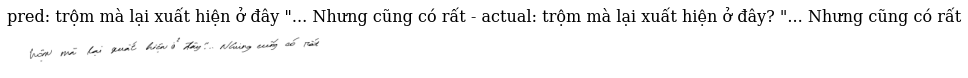

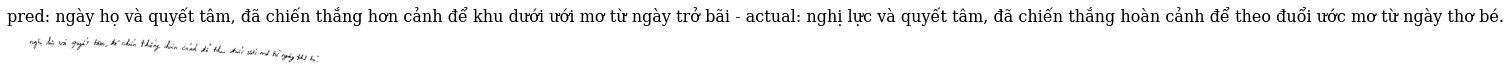

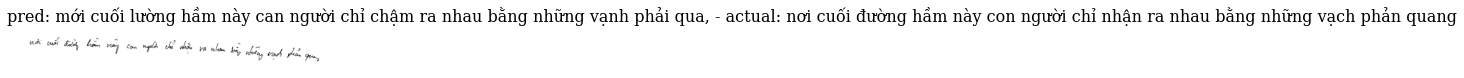

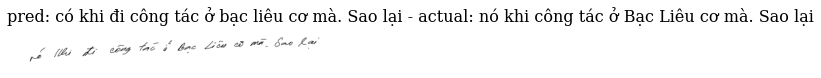

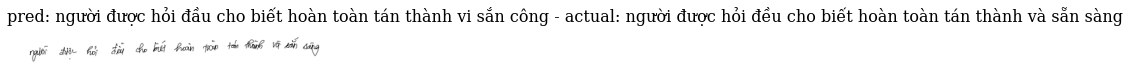

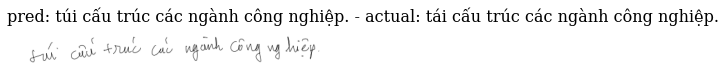

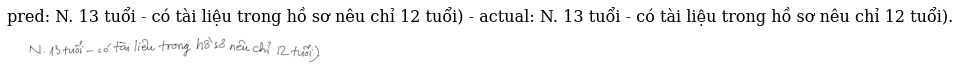

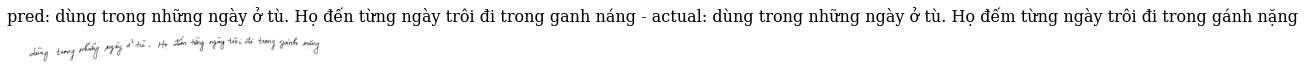

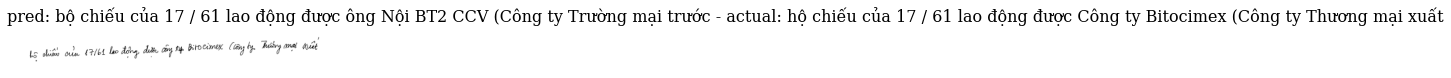

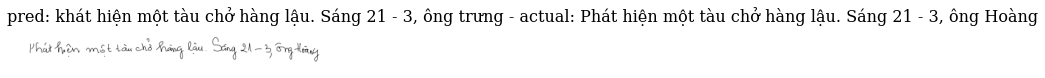

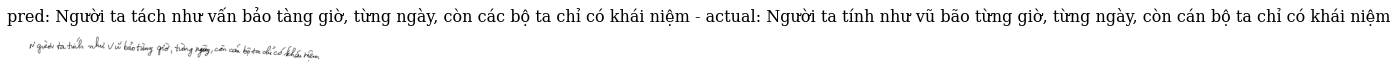

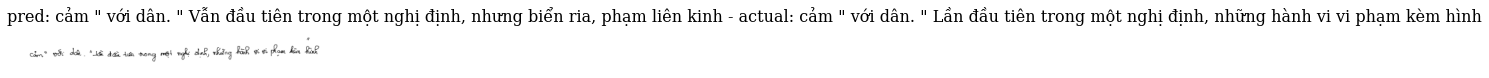

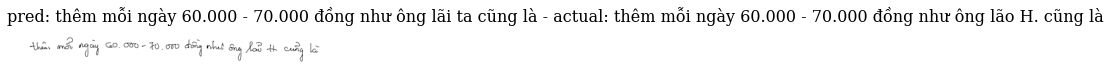

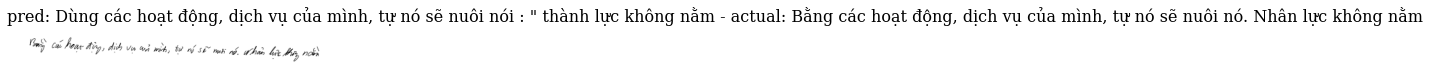

In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.14417613636363635, 0.69174105)